In [73]:
###### Lista de bibliotecas #####
# Numpy: biblioteca de calculo numerico do python
# pandas: biblioteca para operação sobre dados tabulares
# matplotlib: biblioteca para plotar gráficos
# seaborn: biblioteca de alto nível para plotar gráficos baseados no matplotlib
# yahooquery: biblioteca para consultar dados do Yahoo Finance

###### Instalação de bibliotecas #####
# Use o seguinte comando: !pip install <nome_biblioteca>
# Exemplo: !pip install yahooquery
!pip install yahooquery

In [42]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from yahooquery import Ticker

In [72]:
# Definir uma lista de simbolos (ações) de interesse
symbols_list = ['NVDC34.SA', 'TSLA34.SA']
# Criar um objeto Ticker (para fazer o download de dados de cotação de ações)
tc = Ticker(symbols_list)
# Fazer o download de dados de um período de 60 dias, com intervalor de 1d entre cada medição
# Lista de períodos e intervalos possíveis: https://yahooquery.dpguthrie.com/guide/ticker/historical/
df = tc.history(period='10d', interval="1d")
# Mostrar os primeiros 5 registros do dataframe df
# df = df['close']
df.head()

close       high  volume        low       open  \
symbol    date                                                             
NVDC34.SA 2021-02-03  60.740002  61.860001   46708  59.770000  60.900002   
          2021-02-04  60.020000  61.810001  136723  59.970001  60.740002   
          2021-02-05  60.799999  62.290001   26113  60.450001  61.849998   
          2021-02-08  64.550003  64.750000  103393  61.180000  61.650002   
          2021-02-09  61.619999  65.849998   31628  61.619999  64.550003   

                       adjclose  
symbol    date                   
NVDC34.SA 2021-02-03  60.740002  
          2021-02-04  60.020000  
          2021-02-05  60.799999  
          2021-02-08  64.550003  
          2021-02-09  61.619999

In [61]:
df.head()

symbol  date      
AMZN    2020-06-03    2478.399902
        2020-06-04    2460.600098
        2020-06-05    2483.000000
        2020-06-08    2524.060059
        2020-06-09    2600.860107
Name: close, dtype: float64

In [62]:
# Converter o índice (multi-nível) em colunas
df_reset = df.reset_index()
df_reset.head()

,symbol,date,close
0,AMZN,2020-06-03,2478.399902
1,AMZN,2020-06-04,2460.600098
2,AMZN,2020-06-05,2483.000000
3,AMZN,2020-06-08,2524.060059
4,AMZN,2020-06-09,2600.860107


In [63]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  360 non-null    object 
 1   date    360 non-null    object 
 2   close   360 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.6+ KB


In [64]:
# Criar uma nova coluna com a data do dia anterior
df_reset['ontem'] = df_reset['date'].apply(lambda x: x + datetime.timedelta(days=1))
df_reset

,symbol,date,close,ontem
0,AMZN,2020-06-03,2478.399902,2020-06-04
1,AMZN,2020-06-04,2460.600098,2020-06-05
2,AMZN,2020-06-05,2483.000000,2020-06-06
3,AMZN,2020-06-08,2524.060059,2020-06-09
4,AMZN,2020-06-09,2600.860107,2020-06-10
...,...,...,...,...
355,WMT,2021-02-11,144.020004,2021-02-12
356,WMT,2021-02-12,144.470001,2021-02-13
357,WMT,2021-02-16,145.660004,2021-02-17
358,WMT,2021-02-17,147.199997,2021-02-18


In [65]:
# Realizar um merge da data atual com a data do dia anterior
df_merge = df_reset.merge(right=df_reset, left_on=['symbol','date'], right_on=['symbol','ontem'], suffixes=["", "_desloc"])
df_merge.head()

,symbol,date,close,ontem,date_desloc,close_desloc,ontem_desloc
0,AMZN,2020-06-04,2460.600098,2020-06-05,2020-06-03,2478.399902,2020-06-04
1,AMZN,2020-06-05,2483.000000,2020-06-06,2020-06-04,2460.600098,2020-06-05
2,AMZN,2020-06-09,2600.860107,2020-06-10,2020-06-08,2524.060059,2020-06-09
3,AMZN,2020-06-10,2647.449951,2020-06-11,2020-06-09,2600.860107,2020-06-10
4,AMZN,2020-06-11,2557.959961,2020-06-12,2020-06-10,2647.449951,2020-06-11


In [66]:
# Calcular a diferença percentual de um dia para o outro
# (v_hoje - v_ontem ) / v_ontem
df_merge['change_pct'] = (df_merge['close'] - df_merge['close_desloc']) / df_merge['close_desloc']
df_merge

,symbol,date,close,ontem,date_desloc,close_desloc,ontem_desloc,change_pct
0,AMZN,2020-06-04,2460.600098,2020-06-05,2020-06-03,2478.399902,2020-06-04,-0.007182
1,AMZN,2020-06-05,2483.000000,2020-06-06,2020-06-04,2460.600098,2020-06-05,0.009103
2,AMZN,2020-06-09,2600.860107,2020-06-10,2020-06-08,2524.060059,2020-06-09,0.030427
3,AMZN,2020-06-10,2647.449951,2020-06-11,2020-06-09,2600.860107,2020-06-10,0.017913
4,AMZN,2020-06-11,2557.959961,2020-06-12,2020-06-10,2647.449951,2020-06-11,-0.033802
...,...,...,...,...,...,...,...,...
277,WMT,2021-02-10,144.130005,2021-02-11,2021-02-09,145.830002,2021-02-10,-0.011657
278,WMT,2021-02-11,144.020004,2021-02-12,2021-02-10,144.130005,2021-02-11,-0.000763
279,WMT,2021-02-12,144.470001,2021-02-13,2021-02-11,144.020004,2021-02-12,0.003125
280,WMT,2021-02-17,147.199997,2021-02-18,2021-02-16,145.660004,2021-02-17,0.010573


In [67]:
df_pivot = df_merge.pivot('date', 'symbol', 'change_pct')
df_pivot

symbol,AMZN,WMT
date,,
2020-06-04,-0.007182,-0.011015
2020-06-05,0.009103,-0.004504
2020-06-09,0.030427,0.000907
2020-06-10,0.017913,-0.001566
2020-06-11,-0.033802,-0.008831
...,...,...
2021-02-10,-0.005573,-0.011657
2021-02-11,-0.007439,-0.000763
2021-02-12,0.004776,0.003125


In [68]:
df_pivot.corr()

symbol,AMZN,WMT
symbol,,
AMZN,1.000000,0.229683
WMT,0.229683,1.000000


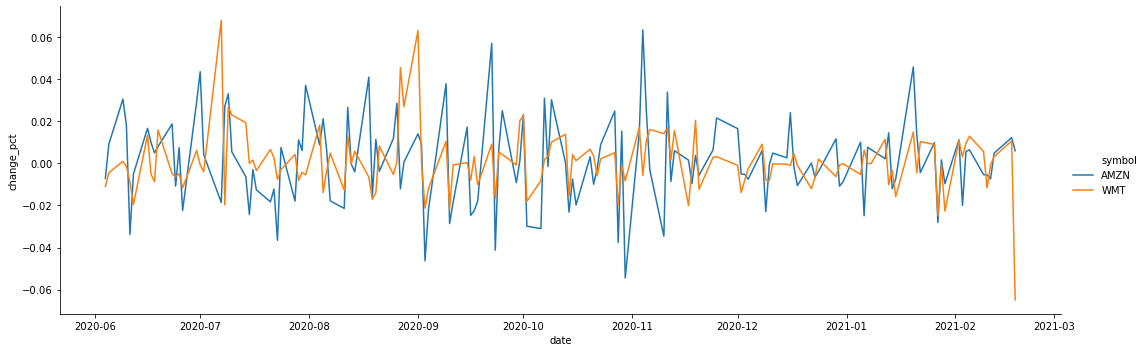

In [69]:
# Curiosidade: Plotar o gráfico da variação da cotação diária
import seaborn as sns
# Plotar um gráfico de linhas
# data: dataframe com os dados
# kind: tipo do grafico de relacionamento. Opções: scatter e line
# x: nome da coluna a ser plotada no eixo x
# y: nome da coluna a ser plotada no eixo y
# hue: coluna de agregação, cujas séries serão representadas por cores distintas.
sns.relplot(data=df_merge, kind='line', aspect=3, x='date', y='change_pct', hue='symbol')
